In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [4]:
df.shape

(614, 12)

In [5]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
(df.dropna()).shape

(499, 12)

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Gender'].fillna('Female',inplace = True)

In [9]:
df['Gender'].value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['Self_Employed'].fillna('Yes',inplace = True)

In [12]:
df['Self_Employed'].value_counts()

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df['Credit_History'].fillna(0.0,inplace = True)

In [15]:
df['Credit_History'] = df['Credit_History'].astype('int')

In [16]:
df['Credit_History'].value_counts()

1    475
0    139
Name: Credit_History, dtype: int64

In [17]:
df.isna().sum()

Gender                 0
Married                3
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [18]:
((df.dropna()).shape)[0]-(df.shape)[0]

-28

In [19]:
df.dropna(inplace = True)

In [20]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,586.0,5.439548e+05,6.227712e+05,15000.0,287375.0,380600.0,581875.0,8100000.0
Coapplicant_Income,586.0,1.637462e+05,2.977957e+05,0.0,0.0,121150.0,228100.0,4166700.0
Loan_Amount,586.0,1.426621e+07,8.950706e+06,0.0,9825000.0,12600000.0,16675000.0,70000000.0
Term,586.0,3.416724e+02,6.487491e+01,12.0,360.0,360.0,360.0,480.0
Credit_History,586.0,7.815700e-01,4.135338e-01,0.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

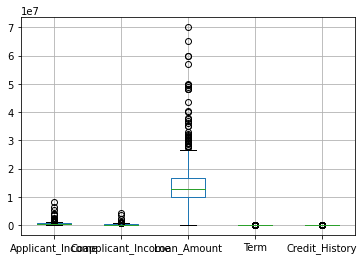

In [23]:
df.boxplot()

<AxesSubplot:>

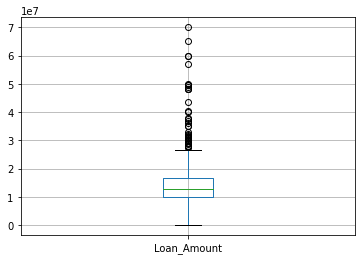

In [24]:
df[['Loan_Amount']].boxplot()

In [25]:
"""
function which take The original data & List of columns to work on.
We have used IQR to finish it
I can replace using mean , mode , lower | upperbound 
"""

def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(0,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = lower_bound # you can replace this value 
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = upper_bound # you can replace this value
            else:
                continue 
    print("handling is done")
    
"""
function returnd list has just names of the continus featurs 
"""
    
def get_continus_list(df_):
    obj = df_.select_dtypes('object')
    lst = list(df_.columns)
    obj_lst = list(obj.columns)
    for i in obj_lst :
        lst.remove(i)
    return lst       

In [26]:
df.reset_index(drop = True,inplace = True)

In [27]:
  handling_outliers(df,get_continus_list(df))

<ipython-input-25-b8608a812a20>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = upper_bound # you can replace this value
<ipython-input-25-b8608a812a20>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = lower_bound # you can replace this value


handling is done


<AxesSubplot:>

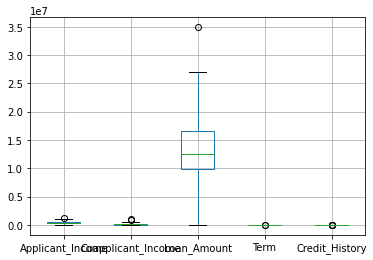

In [29]:
df.boxplot()

# Visualization 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              586 non-null    object 
 1   Married             586 non-null    object 
 2   Dependents          586 non-null    object 
 3   Education           586 non-null    object 
 4   Self_Employed       586 non-null    object 
 5   Applicant_Income    586 non-null    int64  
 6   Coapplicant_Income  586 non-null    float64
 7   Loan_Amount         586 non-null    int64  
 8   Term                586 non-null    float64
 9   Credit_History      586 non-null    int32  
 10  Area                586 non-null    object 
 11  Status              586 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 52.8+ KB


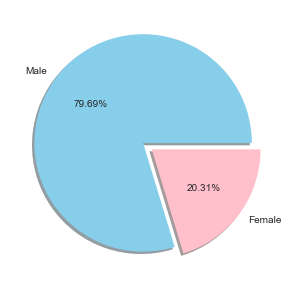

In [33]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["Gender"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

In [34]:
df['Married'].value_counts()

Yes    382
No     204
Name: Married, dtype: int64

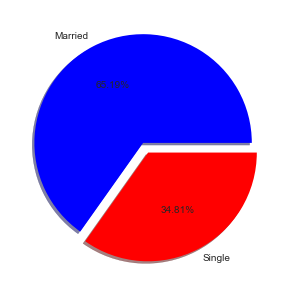

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["Married"].value_counts(), 
        colors=["blue","red"], 
        labels=["Married","Single"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

In [39]:
df['Dependents'].value_counts(), df['Education'].value_counts()

(0     334
 1     101
 2     101
 3+     50
 Name: Dependents, dtype: int64,
 Graduate        462
 Not Graduate    124
 Name: Education, dtype: int64)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

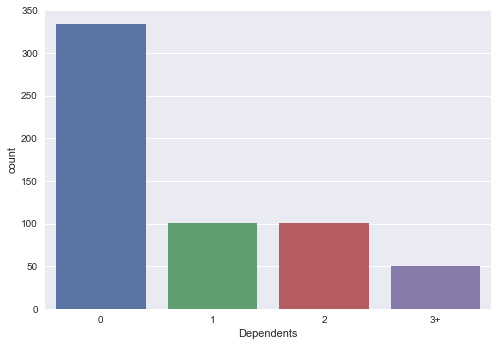

In [42]:
sns.countplot(x = df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

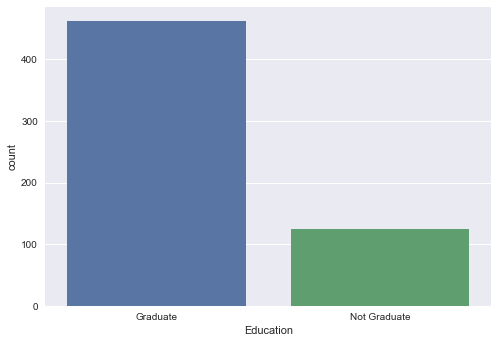

In [43]:
sns.countplot(x = df['Education'])

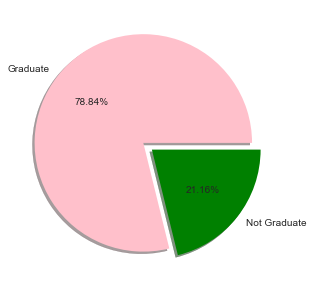

In [50]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["Education"].value_counts(), 
        colors=["pink","green"], 
        labels=["Graduate","Not Graduate"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

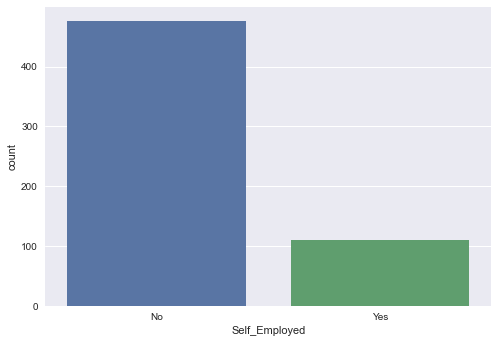

In [51]:
sns.countplot(df['Self_Employed'])

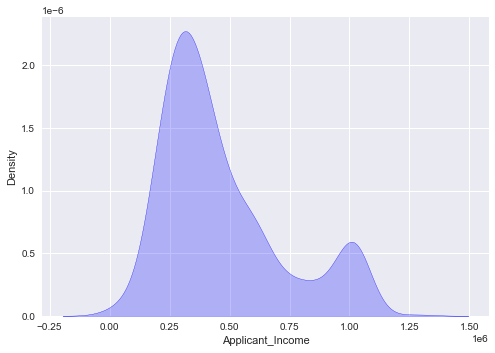

In [55]:
fig = sns.kdeplot(df['Applicant_Income'], shade=True, color="b")

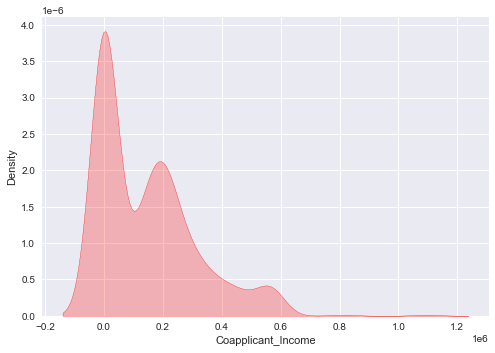

In [56]:
fig = sns.kdeplot(df['Coapplicant_Income'], shade=True, color="r")

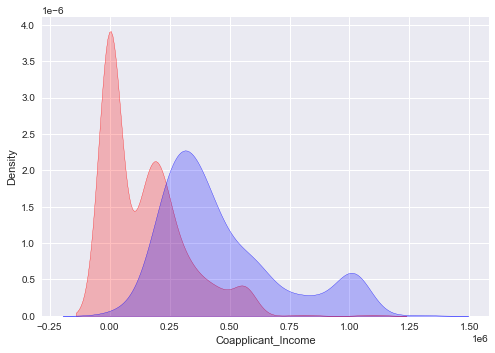

In [57]:
fig1 = sns.kdeplot(df['Coapplicant_Income'], shade=True, color="r")
fig2 = sns.kdeplot(df['Applicant_Income'], shade=True, color="b")

<AxesSubplot:ylabel='Frequency'>

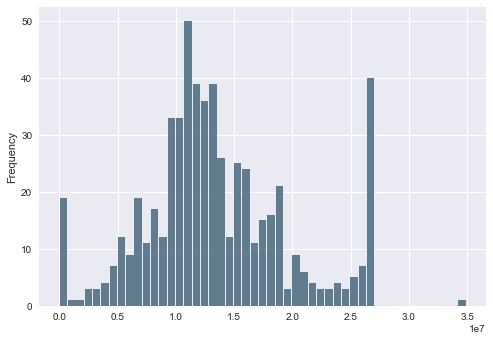

In [61]:
df["Loan_Amount"].plot.hist(grid=True, bins=49, rwidth=0.9,color='#607c8e')

In [63]:
df['Term'].value_counts()

360.0    584
240.0      1
120.0      1
Name: Term, dtype: int64

In [64]:
df['Term'] = df['Term'].astype('int')

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Term', ylabel='count'>

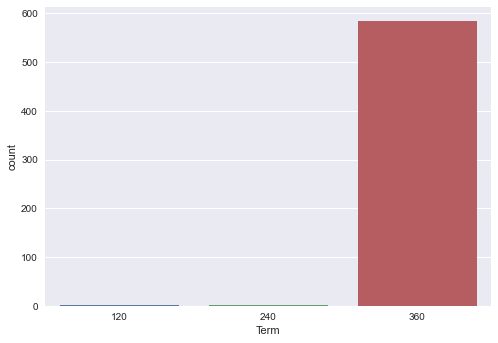

In [65]:
sns.countplot(df['Term'])

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

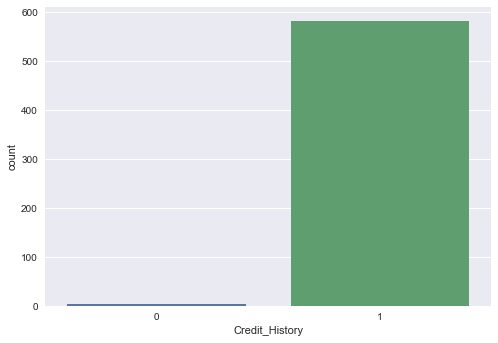

In [67]:
sns.countplot(df['Credit_History'])

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='count'>

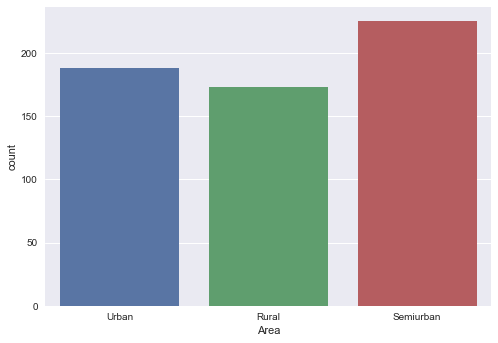

In [68]:
sns.countplot(df['Area'])

# Target

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

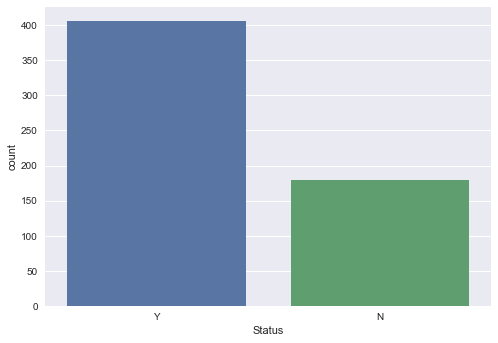

In [69]:
sns.countplot(df['Status'])

## Correlation

In [70]:
df.corr()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
Applicant_Income,1.000000,-0.200741,0.541936,0.056547,0.005954
Coapplicant_Income,-0.200741,1.000000,0.269232,0.023607,0.040096
Loan_Amount,0.541936,0.269232,1.000000,0.079032,0.032904
Term,0.056547,0.023607,0.079032,1.000000,0.220118
Credit_History,0.005954,0.040096,0.032904,0.220118,1.000000


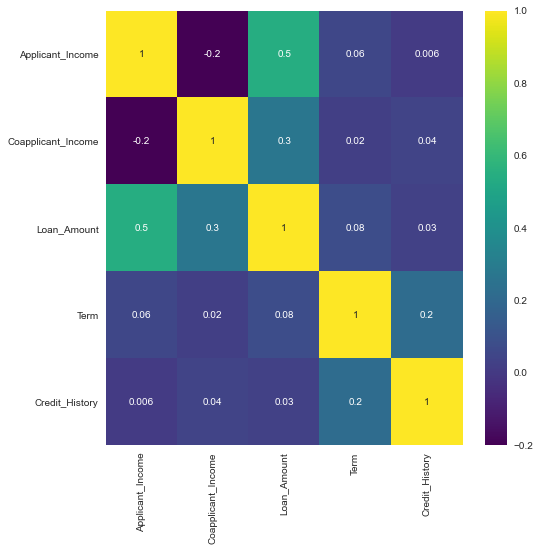

In [71]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              586 non-null    object 
 1   Married             586 non-null    object 
 2   Dependents          586 non-null    object 
 3   Education           586 non-null    object 
 4   Self_Employed       586 non-null    object 
 5   Applicant_Income    586 non-null    int64  
 6   Coapplicant_Income  586 non-null    float64
 7   Loan_Amount         586 non-null    int64  
 8   Term                586 non-null    int32  
 9   Credit_History      586 non-null    int32  
 10  Area                586 non-null    object 
 11  Status              586 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 50.5+ KB


In [74]:
df= df.replace({"Status":{ "Y" :1,"N":0 }})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360,1,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360,1,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360,1,Urban,1


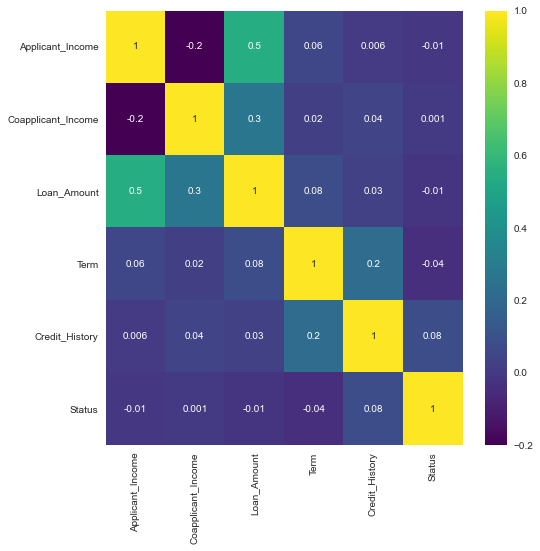

In [75]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True)

In [76]:
df.corr()['Status']

Applicant_Income     -0.009904
Coapplicant_Income    0.001032
Loan_Amount          -0.013391
Term                 -0.036960
Credit_History        0.079580
Status                1.000000
Name: Status, dtype: float64

<AxesSubplot:xlabel='Applicant_Income', ylabel='Loan_Amount'>

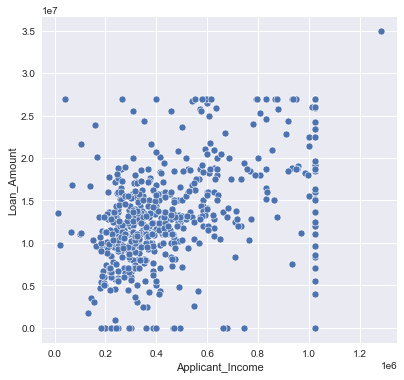

In [78]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='Applicant_Income',y='Loan_Amount',data=df,)

<AxesSubplot:xlabel='Applicant_Income', ylabel='Loan_Amount'>

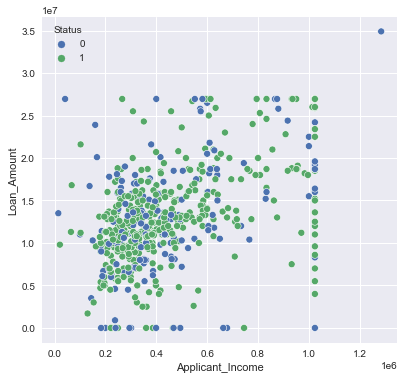

In [81]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='Applicant_Income',y='Loan_Amount',hue='Status' ,data=df,)